In [ ]:
# Implementation of https://www.roboticsbook.org/S64_driving_perception.html#the-poseslam-factor-graph

In [10]:
import gtsam
import gtsam.utils.plot as gtsam_plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
graph = gtsam.NonlinearFactorGraph()
prior_model = gtsam.noiseModel.Diagonal.Sigmas((0.05, 0.05, 0.05, 0.1, 0.1, 0.1))
graph.add(gtsam.PriorFactorPose2(1, gtsam.Pose3(0, 0, 0,0,0,0), prior_model))

# Create odometry (Between) factors between consecutive poses
odometry_model = gtsam.noiseModel.Diagonal.Sigmas((0.05, 0.05, 0.05, 0.1, 0.1, 0.1))
Between = gtsam.BetweenFactorPose2
graph.add(Between(1, 2, gtsam.Pose2(2, 0, 0), odometry_model))
graph.add(Between(2, 3, gtsam.Pose2(2, 0, np.pi/2), odometry_model))
graph.add(Between(3, 4, gtsam.Pose2(2, 0, np.pi/2), odometry_model))
graph.add(Between(4, 5, gtsam.Pose2(2, 0, np.pi/2), odometry_model))

# Add the loop closure constraint
graph.add(Between(5, 2, gtsam.Pose2(2, 0, np.pi/2), odometry_model))

In [3]:
# Create the initial estimate
initial_estimate = gtsam.Values()
initial_estimate.insert(1, gtsam.Pose2(0.5, 0.0, 0.2))
initial_estimate.insert(2, gtsam.Pose2(2.3, 0.1, -0.2))
initial_estimate.insert(3, gtsam.Pose2(4.1, 0.1, np.pi/2))
initial_estimate.insert(4, gtsam.Pose2(4.0, 2.0, np.pi))
initial_estimate.insert(5, gtsam.Pose2(2.1, 2.1, -np.pi/2))
print(initial_estimate)

Values with 5 values:
Value 1: (gtsam::Pose2)
(0.5, 0, 0.2)

Value 2: (gtsam::Pose2)
(2.3, 0.1, -0.2)

Value 3: (gtsam::Pose2)
(4.1, 0.1, 1.5708)

Value 4: (gtsam::Pose2)
(4, 2, 3.14159)

Value 5: (gtsam::Pose2)
(2.1, 2.1, -1.5708)




In [8]:
# Optimize the initial values using a Gauss-Newton nonlinear optimizer
optimizer = gtsam.GaussNewtonOptimizer(graph, initial_estimate)
result = optimizer.optimize()
print("Final Result:\n{}".format(result))

Final Result:
Values with 5 values:
Value 1: (gtsam::Pose2)
(-2.76843e-20, -8.152e-20, -3.57721e-20)

Value 2: (gtsam::Pose2)
(2, -1.89295e-19, -5.34287e-20)

Value 3: (gtsam::Pose2)
(4, -3.42174e-11, 1.5708)

Value 4: (gtsam::Pose2)
(4, 2, 3.14159)

Value 5: (gtsam::Pose2)
(2, 2, -1.5708)




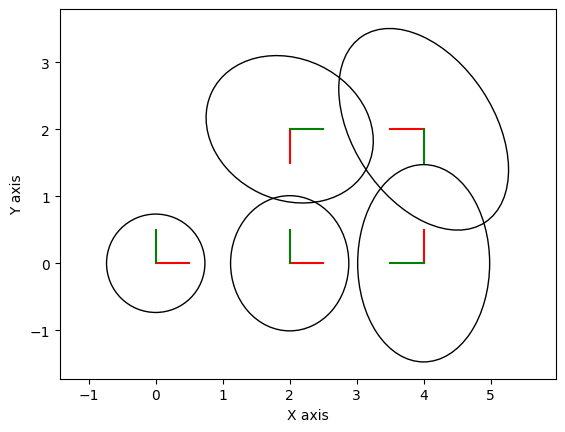

In [11]:
marginals = gtsam.Marginals(graph, result)
for i in range(1, 6):
    gtsam_plot.plot_pose2(0, result.atPose2(i), 0.5,
                          marginals.marginalCovariance(i))
plt.axis('equal'); plt.show()